In [1]:
import numpy as np
import pandas as pd

import os # used for navigating to image path
import imageio # used for writing images

from sklearn.preprocessing import LabelEncoder

import keras

#  Keras preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image_dataset_from_directory

# Keras modeling
from keras.models import Sequential
from keras.layers import  Lambda , Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [12]:
train = pd.read_csv('train.csv', error_bad_lines=False, sep = '\t')
test = pd.read_csv('test.csv', error_bad_lines=False, sep = '\t')

In [13]:
train.head()

,imageid,label,productname
0,2653,Bags,Murcia Women Leather Office Grey Bag
1,55997,Others,Colorbar Velvet Matte Temptation Lipstick 24MA
2,2640,Shoes,Carlton London Men Brown Formal Shoes
3,40565,Topwear,W Women Maroon Kurta
4,38932,Bottomwear,Gini and Jony Girls Pink Leggings


In [14]:
train['image'] = train.apply(lambda row: str(row['imageid']) + ".jpg", axis=1)
test['image'] = test.apply(lambda row: str(row['imageid']) + ".jpg", axis=1)





In [15]:
path = 'images/'
batch_size = 40
target_size = (100,100)
epochs = 40
num_train_samples = train.shape[0]
num_test_samples = test.shape[0]

In [16]:

image_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#image_generator = ImageDataGenerator(rescale=1/255)
image_generator_test = ImageDataGenerator(rescale=1/255)

training_generator = image_generator.flow_from_dataframe(
    dataframe=train,
    directory=path,
    x_col="image",
    y_col="label",
    target_size=target_size,
    color_mode="grayscale",
    batch_size=batch_size,
    subset="training"
)

test_generator = image_generator_test.flow_from_dataframe(
    dataframe=test,
    directory=path,
    x_col="image",
    y_col="label",
    target_size=target_size,
    color_mode="grayscale",
    batch_size=batch_size,
    subset="validation"
)


Found 40441 validated image filenames belonging to 13 classes.
Found 0 validated image filenames belonging to 13 classes.


My model

Input -> conv2d -> conv2d -> maxpool2d -> dropout -> conv2d -> conv2d -> maxpool2d -> dropout -> flatten -> dropout -> dense -> dropout -> dense

In [2]:
model = Sequential(
    [
        keras.Input(shape=(100, 100, 1)),
        Conv2D(32, kernel_size=(4, 4), activation="relu"),
        Conv2D(32, kernel_size=(4, 4), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),
        Conv2D(32, kernel_size=(4, 4), activation="relu"),
        Conv2D(32, kernel_size=(4, 4), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),
        Flatten(),
        Dropout(0.1),
        Dense(256, activation = "relu"),
        Dropout(0.1),
        Dense(13, activation="softmax"),
        
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 97, 97, 32)        544       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 32)        16416     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_data, train_labels,
          epochs=1,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))
model.save_weights('bottleneck_fc_model.h5')

In [20]:
model.fit_generator(
        training_generator,
        steps_per_epoch=num_train_samples // batch_size,
        epochs=5,
        #verbose=1,
        validation_data=test_generator,
        validation_steps=num_test_samples // batch_size)

C:\Users\24937\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1011/1011 [==============================] - 1531s 2s/step - loss: 0.1994 - accuracy: 0.4724
Epoch 2/5
1011/1011 [==============================] - 1636s 2s/step - loss: 0.1191 - accuracy: 0.6985
Epoch 3/5
  17/1011 [..............................] - ETA: 30:08 - loss: 0.1038 - accuracy: 0.7373

KeyboardInterrupt: 

In [ ]:
pred = keras.model.predict_classes(test_x, verbose=1)

In [19]:
break

SyntaxError: 'break' outside loop (<ipython-input-19-6aaf1f276005>, line 4)

In [3]:
img = load_img('images/1163.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (80, 60, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 80, 60, 3)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='shirt', save_format='jpeg'):
    i += 1
    if i > 20:
        break

(1, 80, 60, 3)


In [4]:
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)

NameError: name 'df' is not defined

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='shirt', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [6]:
training_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory=DATASET_PATH + "images",
    x_col="image",
    y_col="subCategory",
    target_size=(96,96),
    batch_size=batch_size,
    subset="training"
)

NameError: name 'image_generator' is not defined

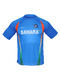

In [5]:
load_img('images/1163.jpg')

In [ ]:
image_dataset_from_directory('images/', labels='inferred')